# Processamento Digital de Imagens

1001527 - Turma A

Prof. Cesar Henrique Comin

## Análise experimental de complexidade da convolução espacial e por FFT

### Equipe
Igor Teixeira Machado RA: 769708

Rafael Vinícius Passador RA: 790036

## Introdução

Dada uma imagem $f$ e um filtro $w$ de tamanho $a\times b$, a correlação-cruzada para cada pixel $(x,y)$ da imagem é calculada pela fórmula

\begin{equation}
g(x,y)=\sum_{s=0}^{a}\sum_{t=0}^{b}w(s,t)f(x+s-\frac{a}{2}, y+t-\frac{b}{2})
\end{equation}

A convolução é avaliada para todos os valores das variáveis de deslocamento x e y de modo que o centro de w visite cada pixel em f, que supõe-se ter sido preenchido. Analogamente, utiliza-se a mesma equação para calcular a convolução entre um filtro e um sinal.


A FFT y(k) de comprimento $N$ da $N-ésima$ sequência de x(n) é definida como

\begin{equation}
y(k) = \sum_{n=0}^{N-1} e^{-2 \pi j \frac{k n}{N} } x(n) 
\end{equation}

e sua inversa é definida como

\begin{equation}
x(n) = \frac{1}{N} \sum_{k=0}^{N-1} e^{2 \pi j \frac{k n}{N} } y(k)
\end{equation}

A partir dessas equações, utiliza-se as funções de implementação da biblioteca scipy.fft, a qual aplica as equações supracitadas de convolução e FFT.

## Instalações Necessárias

* pip install numpy
* python -m pip install -U matplotlib
* pip install scipy

## Implementação

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fftpack import fft2, ifft2, fftfreq, fftshift
import timeit
import random
import os

In [2]:
def random_matrix(n,m):
    matrix = np.zeros((n,m))

    for i in range(n):
        for j in range(m):
            matrix[i][j] = random.randint(0, 255)

    return matrix

def filtroTransform(filtro, img):

    filtro = filtro/filtro.sum()

    num_rows, num_cols = img.shape
    img_padded = np.pad(img, ((0, num_rows), (0, num_cols)), mode='constant', constant_values = 0)
    filt_image = np.zeros([2 * num_rows, 2 * num_cols])
    filt_image[num_rows - 3:num_rows + 4, num_cols - 3:num_cols + 4] = filtro

    filt_image = fftshift(filt_image)
    Ffilt = fft2(filt_image)
    freq_r = fftfreq(2 * num_rows)
    freq_c = fftfreq(2 * num_cols)

    Ffilt = fftshift(Ffilt)
    freq_r = fftshift(freq_r)
    freq_c = fftshift(freq_c)

    return Ffilt, freq_r, freq_c

def testeTempoExecucao(sinal, filtro, numeroExecucoes, lista1, lista2):

    #filtro, _, _ = filtroTransform(filtro, sinal)
    convolveDirect = np.zeros(sinal.shape, dtype=np.uint16)
    convolveFFT = np.zeros(sinal.shape, dtype=np.uint16)
    convolveDirect_time = timeit.timeit(convolveDirect := lambda : (signal.convolve(sinal, filtro, method='direct')), number = numeroExecucoes)
    lista1.append(convolveDirect_time)
    convolveFFT_time = timeit.timeit(convolveFFT := lambda : (signal.convolve(sinal, filtro, method='fft')), number = numeroExecucoes)
    lista2.append(convolveFFT_time)
    print("Tempo do método direto: %f" % convolveDirect_time + " Tamanho do sinal: " + str(sinal.shape) + " Tamanho do filtro: " + str(filtro.shape))
    print("Tempo do método FFT: %f" % convolveFFT_time + " Tamanho do sinal: " + str(sinal.shape) + " Tamanho do filtro: " + str(filtro.shape))
    compararTempoMetodos(convolveDirect_time, convolveFFT_time)

    return convolveDirect, convolveFFT

def compararTempoMetodos(timeDirect, timeFFT):

    print("Diferença entre os tempos: " + str(abs(timeFFT - timeDirect)))

    if timeDirect < timeFFT:
        print("Método direto é mais rápido")
    else:
        print("Método FFT é mais rápido")
    pass

In [3]:
# Filtro fixo e sinal váriavel
filtro = random_matrix(5,5)
lista_conv = []
lista_fft = []
for i in range(2, 100):
    sinal = random_matrix(i, i)
    testeTempoExecucao(sinal, filtro, 10, lista_conv, lista_fft)

Tempo do método direto: 0.000343 Tamanho do sinal: (2, 2) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.001031 Tamanho do sinal: (2, 2) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 0.000687899999320507
Método direto é mais rápido
Tempo do método direto: 0.000169 Tamanho do sinal: (3, 3) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.000821 Tamanho do sinal: (3, 3) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 0.000651500013191253
Método direto é mais rápido
Tempo do método direto: 0.000181 Tamanho do sinal: (4, 4) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.000554 Tamanho do sinal: (4, 4) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 0.0003727999865077436
Método direto é mais rápido
Tempo do método direto: 0.000289 Tamanho do sinal: (5, 5) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.000584 Tamanho do sinal: (5, 5) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 0.0002945000014733523
Método direto é mais rápido
Tempo do método direto: 0.000354 T

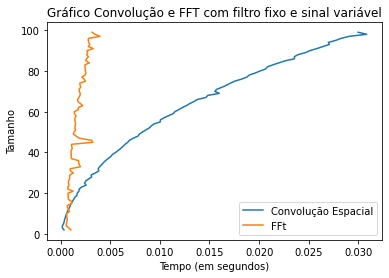

In [4]:
map(float,lista_conv)
map(float, lista_fft)
list_size = []

for i in range(2, 100):
    list_size.append(i)

import matplotlib.pyplot as plt

map(float, list_size)

# line 1 points
plt.plot(lista_conv, list_size, label = "Convolução Espacial")
  
# line 2 points
plt.plot(lista_fft, list_size, label = "FFt")
  
# naming the x axis
plt.xlabel('Tempo (em segundos)')
# naming the y axis
plt.ylabel('Tamanho')
# giving a title to my graph
plt.title('Gráfico Convolução e FFT com filtro fixo e sinal variável')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

In [5]:
# sinal fixo e filtro variável
lista_conv = []
lista_fft = []
sinal = random_matrix(50, 50)
for i in range(2, 10):
    filtro = random_matrix(i, i)
    testeTempoExecucao(sinal, filtro, 10, lista_conv, lista_fft)

Tempo do método direto: 0.002133 Tamanho do sinal: (50, 50) Tamanho do filtro: (2, 2)
Tempo do método FFT: 0.001704 Tamanho do sinal: (50, 50) Tamanho do filtro: (2, 2)
Diferença entre os tempos: 0.0004285999748390168
Método FFT é mais rápido
Tempo do método direto: 0.003289 Tamanho do sinal: (50, 50) Tamanho do filtro: (3, 3)
Tempo do método FFT: 0.001537 Tamanho do sinal: (50, 50) Tamanho do filtro: (3, 3)
Diferença entre os tempos: 0.0017524000140838325
Método FFT é mais rápido
Tempo do método direto: 0.005646 Tamanho do sinal: (50, 50) Tamanho do filtro: (4, 4)
Tempo do método FFT: 0.001343 Tamanho do sinal: (50, 50) Tamanho do filtro: (4, 4)
Diferença entre os tempos: 0.004303199995774776
Método FFT é mais rápido
Tempo do método direto: 0.008306 Tamanho do sinal: (50, 50) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.001261 Tamanho do sinal: (50, 50) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 0.007045300008030608
Método FFT é mais rápido
Tempo do método direto: 0.0118

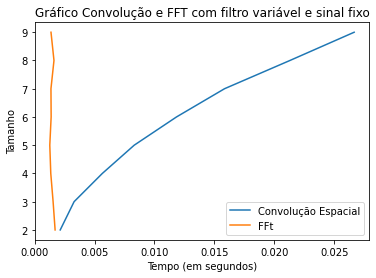

In [6]:
map(float,lista_conv)
map(float, lista_fft)
list_size = []

for i in range(2, 10):
    list_size.append(i)

import matplotlib.pyplot as plt

map(float, list_size)

# line 1 points
plt.plot(lista_conv, list_size, label = "Convolução Espacial")
  
# line 2 points
plt.plot(lista_fft, list_size, label = "FFt")
  
# naming the x axis
plt.xlabel('Tempo (em segundos)')
# naming the y axis
plt.ylabel('Tamanho')
# giving a title to my graph
plt.title('Gráfico Convolução e FFT com filtro variável e sinal fixo')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

(378, 400)
Tempo do método direto: 0.101552 Tamanho do sinal: (378, 400) Tamanho do filtro: (2, 2)
Tempo do método FFT: 0.064207 Tamanho do sinal: (378, 400) Tamanho do filtro: (2, 2)
Diferença entre os tempos: 0.03734479998820461
Método FFT é mais rápido
Tempo do método direto: 0.180897 Tamanho do sinal: (378, 400) Tamanho do filtro: (3, 3)
Tempo do método FFT: 0.062232 Tamanho do sinal: (378, 400) Tamanho do filtro: (3, 3)
Diferença entre os tempos: 0.11866549999103881
Método FFT é mais rápido
Tempo do método direto: 0.313419 Tamanho do sinal: (378, 400) Tamanho do filtro: (4, 4)
Tempo do método FFT: 0.062598 Tamanho do sinal: (378, 400) Tamanho do filtro: (4, 4)
Diferença entre os tempos: 0.2508213000255637
Método FFT é mais rápido
Tempo do método direto: 0.451553 Tamanho do sinal: (378, 400) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.063881 Tamanho do sinal: (378, 400) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 0.3876715000078548
Método FFT é mais rápido
Tempo do mé

C:\Users\Rafael Passador\AppData\Local\Temp\ipykernel_17496\2045212882.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Tempo do método direto: 2.355593 Tamanho do sinal: (378, 400) Tamanho do filtro: (12, 12)
Tempo do método FFT: 0.072085 Tamanho do sinal: (378, 400) Tamanho do filtro: (12, 12)
Diferença entre os tempos: 2.283507800020743
Método FFT é mais rápido
Tempo do método direto: 2.971165 Tamanho do sinal: (378, 400) Tamanho do filtro: (13, 13)
Tempo do método FFT: 0.072115 Tamanho do sinal: (378, 400) Tamanho do filtro: (13, 13)
Diferença entre os tempos: 2.8990496000042185
Método FFT é mais rápido
Tempo do método direto: 3.353229 Tamanho do sinal: (378, 400) Tamanho do filtro: (14, 14)
Tempo do método FFT: 0.071908 Tamanho do sinal: (378, 400) Tamanho do filtro: (14, 14)
Diferença entre os tempos: 3.281321199989179
Método FFT é mais rápido


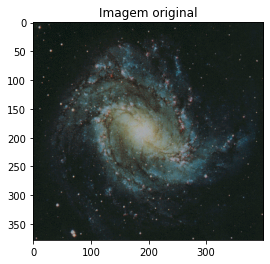

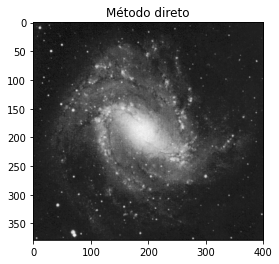

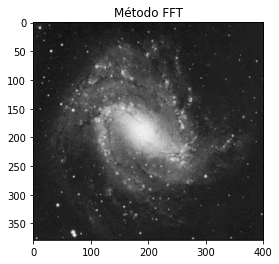

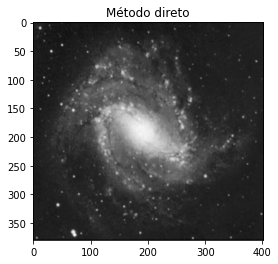

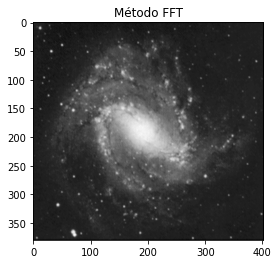

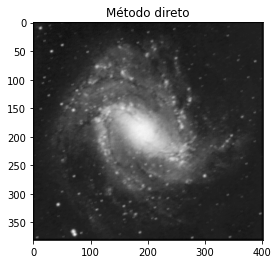

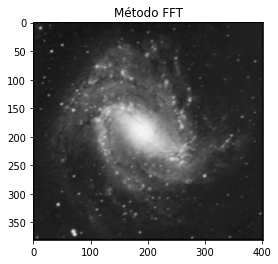

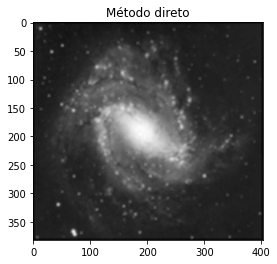

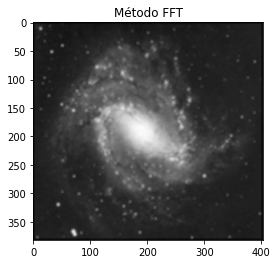

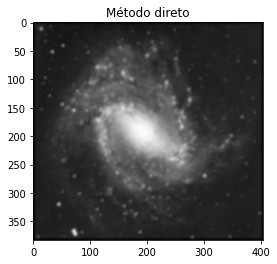

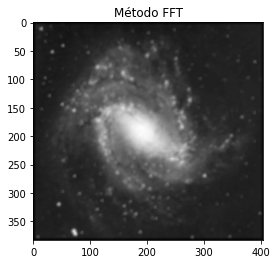

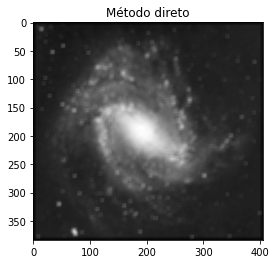

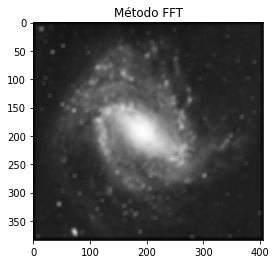

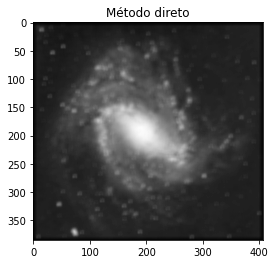

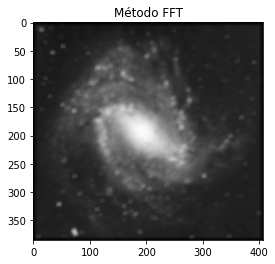

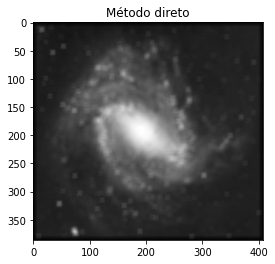

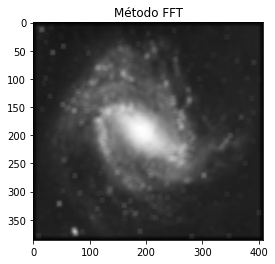

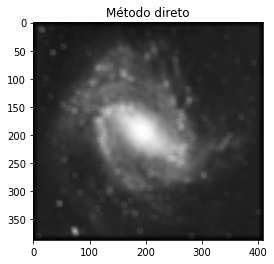

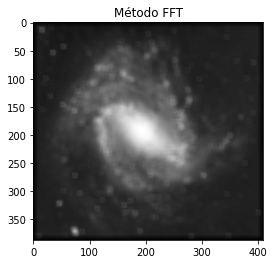

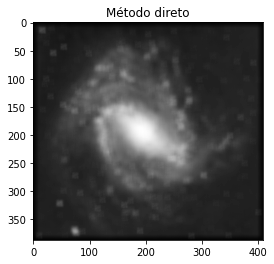

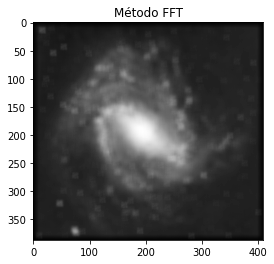

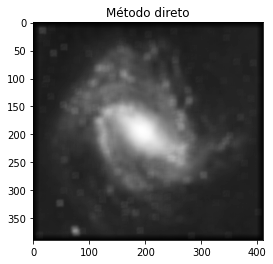

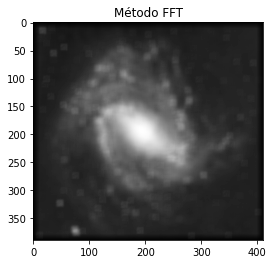

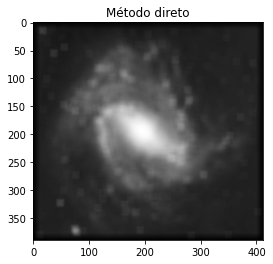

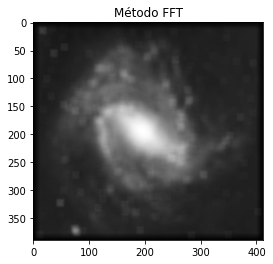

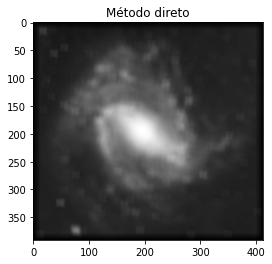

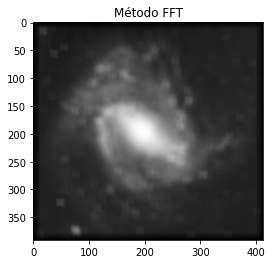

In [7]:
# imagem fixa e filtro variável
lista_conv = []
lista_fft = []
img = plt.imread('Fotos/2m83.tif')
plt.figure()
plt.imshow(img, cmap='gray')
plt.title("Imagem original")
img = img[:,:,0]
print(img.shape)
for i in range(2, 15):
    filtro = random_matrix(i, i)
    imgDirect, imgFFT = testeTempoExecucao(img, filtro, 10, lista_conv, lista_fft)
    plt.figure()
    plt.imshow(imgDirect(), cmap='gray')
    plt.title("Método direto")
    plt.figure()
    plt.imshow(imgFFT(), cmap='gray')
    plt.title("Método FFT")

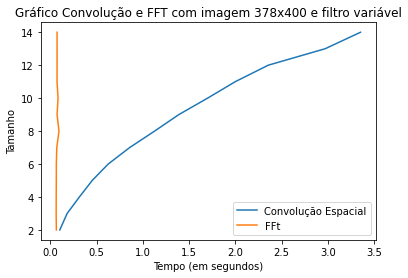

In [8]:
map(float,lista_conv)
map(float, lista_fft)
list_size = []

for i in range(2, 15):
    list_size.append(i)

import matplotlib.pyplot as plt

map(float, list_size)

# line 1 points
plt.plot(lista_conv, list_size, label = "Convolução Espacial")
  
# line 2 points
plt.plot(lista_fft, list_size, label = "FFt")
  
# naming the x axis
plt.xlabel('Tempo (em segundos)')
# naming the y axis
plt.ylabel('Tamanho')
# giving a title to my graph
plt.title('Gráfico Convolução e FFT com imagem 378x400 e filtro variável')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

Tempo do método direto: 0.204558 Tamanho do sinal: (223, 298) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.028114 Tamanho do sinal: (223, 298) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 0.17644419998396188
Método FFT é mais rápido
Tempo do método direto: 0.483682 Tamanho do sinal: (378, 400) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.079309 Tamanho do sinal: (378, 400) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 0.40437339997151867
Método FFT é mais rápido
Tempo do método direto: 0.977712 Tamanho do sinal: (480, 640) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.141681 Tamanho do sinal: (480, 640) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 0.8360302000364754
Método FFT é mais rápido
Tempo do método direto: 0.944059 Tamanho do sinal: (480, 640) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.156296 Tamanho do sinal: (480, 640) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 0.7877627999987453
Método FFT é mais rápido
Tempo do método direto

C:\Users\Rafael Passador\AppData\Local\Temp\ipykernel_17496\694963694.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Tempo do método direto: 0.574745 Tamanho do sinal: (537, 358) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.084571 Tamanho do sinal: (537, 358) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 0.4901743999798782
Método FFT é mais rápido
Tempo do método direto: 0.922010 Tamanho do sinal: (640, 480) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.131743 Tamanho do sinal: (640, 480) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 0.7902673999778926
Método FFT é mais rápido
Tempo do método direto: 2.473762 Tamanho do sinal: (773, 1076) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.409992 Tamanho do sinal: (773, 1076) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 2.063770199980354
Método FFT é mais rápido


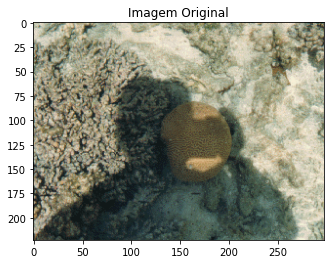

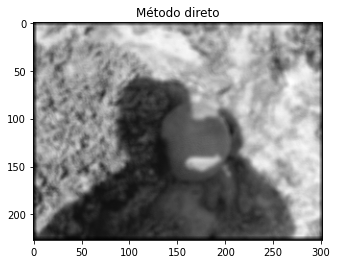

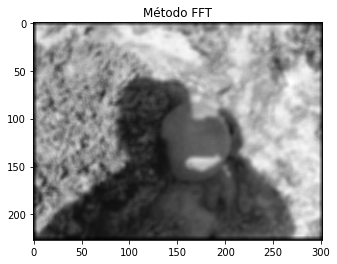

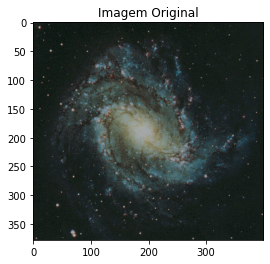

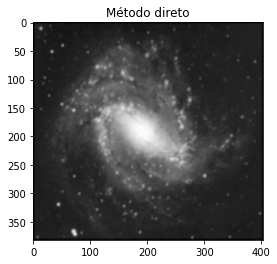

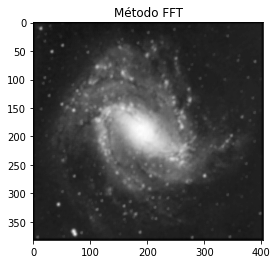

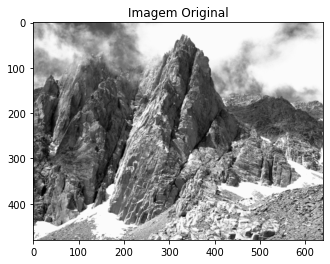

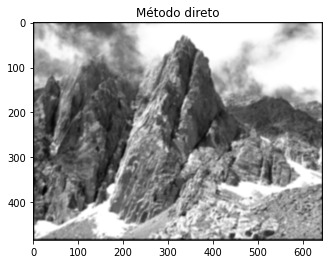

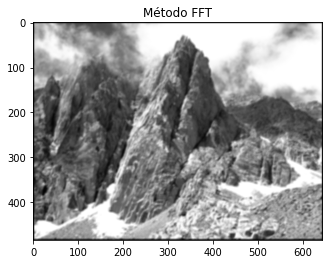

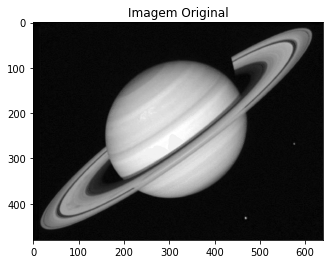

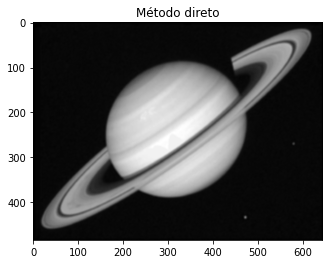

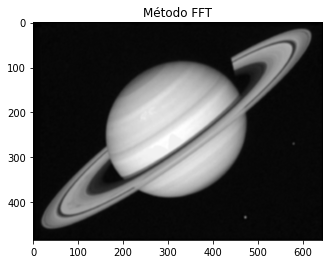

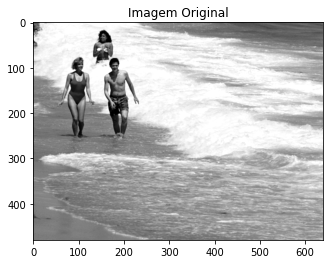

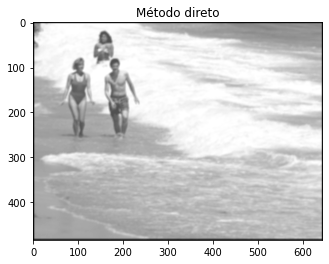

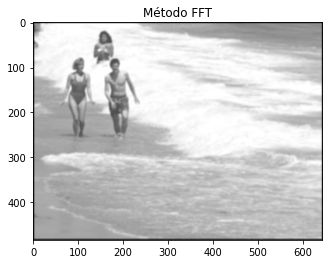

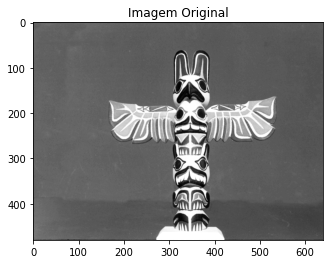

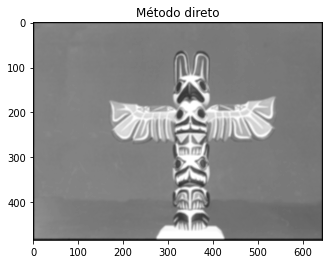

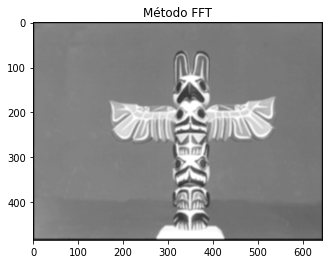

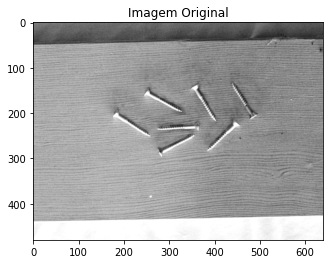

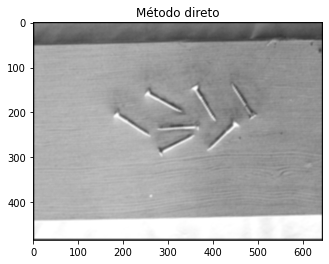

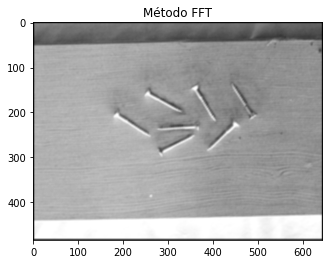

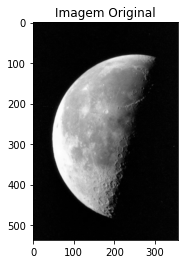

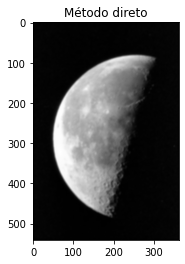

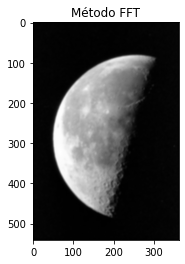

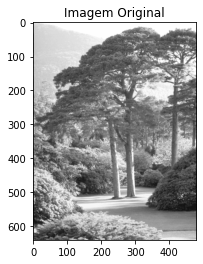

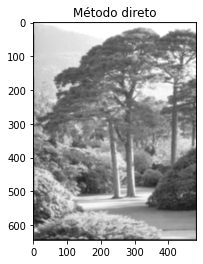

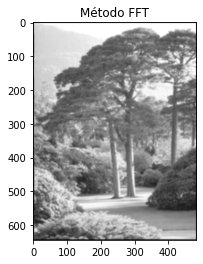

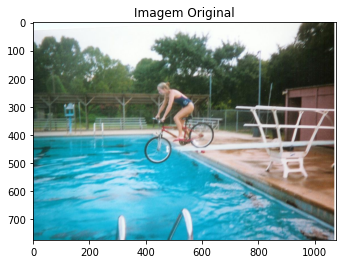

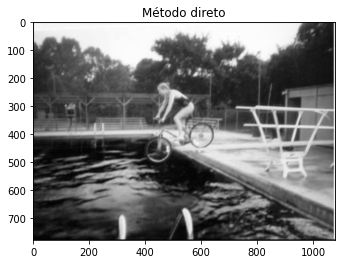

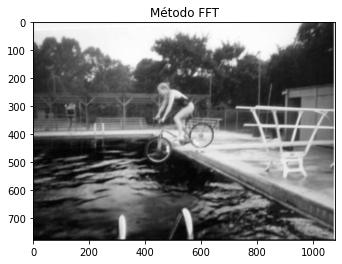

In [9]:
# imagem variável e filtro fixo
lista_conv = []
lista_fft = []
filtro = random_matrix(5,5)
for imageName in os.listdir('Fotos'):
    img = plt.imread('Fotos/' + imageName)
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.title("Imagem Original")
    
    if img.ndim == 3:
        img = img[:,:,0]

    imgDirect, imgFFT = testeTempoExecucao(img, filtro, 10, lista_conv, lista_fft)
    plt.figure()
    plt.imshow(imgDirect(), cmap='gray')
    plt.title("Método direto")
    plt.figure()
    plt.imshow(imgFFT(), cmap='gray')
    plt.title("Método FFT")

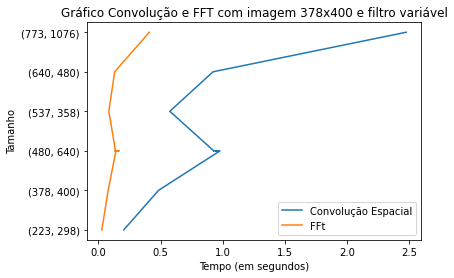

In [10]:
map(float,lista_conv)
map(float, lista_fft)
list_size = ["(223, 298)", "(378, 400)", "(480, 640)", "(480, 640)", "(480, 640)",  "(480, 640)", "(480, 640)", "(537, 358)", "(640, 480)", "(773, 1076)"]

import matplotlib.pyplot as plt

map(float, list_size)

# line 1 points
plt.plot(lista_conv, list_size, label = "Convolução Espacial")
  
# line 2 points
plt.plot(lista_fft, list_size, label = "FFt")
  
# naming the x axis
plt.xlabel('Tempo (em segundos)')
# naming the y axis
plt.ylabel('Tamanho')
# giving a title to my graph
plt.title('Gráfico Convolução e FFT com imagem 378x400 e filtro variável')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()